***Troop Analysis*** <br>
Authors: Aurelien Giuglaris Michael, Laurent Bijman, Antoine Dorard


**Load Troop Data** <br>
Load troop data and do some first cleaning. Special, seasonal troops and troops unlocked at townhall higher than 9 are dropped.

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the json file using pandas
def get_troop_data(path):
    df = pd.read_json(path)
    return df.drop(df.columns[0], axis=1)


cwd = os.getcwd()
print(cwd)
df = get_troop_data('troopUpgradeStats.json')
# Want to keep troups only from our main home
df = df[df['village'] == 'home']
# Only troops that are available all the time
df = df[df['seasonal'] == False]
# remove the spells
df = df[df['category'] == 'troop']
# remove the siege troup
df = df[df['subCategory'] == 'troop']
# Filter the troups above our TH level

index=0
df = df.reset_index()

for i in df['unlock']:
    if i.get('hall')>9:
        df = df.drop(index)
    index += 1
df = df.reset_index()
df.drop('level_0', axis=1, inplace=True)

# Find the index of the row where the name is equal to "Super Barbarian" remove super troops
index_to_keep = df[df['name'] == 'Super Barbarian'].index[0]
df = df.iloc[:index_to_keep]

# Add the heros to the dataframe
df_heros = get_troop_data('troopUpgradeStats.json')
df_heros = df_heros[df_heros['category'] == 'hero']
df_heros = df_heros.head(2)
df = pd.concat([df,df_heros])
df = df.reset_index()
df.drop('level_0', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
df.head(20)


c:\Users\aured\Desktop\Learning Material\Bsc - DSAI UM\Year 3\Semester 2 Period 4\Data Analysis\Data Madness\Code\Clash_of_Clans_Data_Analysis\Troop Analysis


,name,housingSpace,village,category,subCategory,unlock,trainingTime,regenerationTimes,dps,upgrade,minLevel,seasonal,levels,resourceType
0,Barbarian,1,home,troop,troop,"{'hall': 1, 'cost': 100, 'time': 10, 'resource...",5,[],"[8, 11, 14, 18, 23, 26, 30, 34, 38, 42, 45, 48]","{'cost': [20000, 60000, 200000, 650000, 140000...",1,False,"[1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11...",NaN
1,Archer,1,home,troop,troop,"{'hall': 2, 'cost': 500, 'time': 60, 'resource...",6,[],"[7, 9, 12, 16, 20, 22, 25, 28, 31, 34, 37, 40]","{'cost': [30000, 80000, 300000, 800000, 200000...",1,False,"[0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11...",NaN
2,Goblin,1,home,troop,troop,"{'hall': 2, 'cost': 5000, 'time': 3600, 'resou...",7,[],"[11, 14, 19, 24, 32, 42, 52, 62, 72]","{'cost': [45000, 175000, 500000, 1200000, 2000...",1,False,"[0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 7, 8, 8, 8, 9, 9]",NaN
3,Giant,5,home,troop,troop,"{'hall': 2, 'cost': 2500, 'time': 600, 'resour...",30,[],"[11, 14, 19, 24, 31, 43, 55, 62, 70, 78, 86, 94]","{'cost': [40000, 150000, 500000, 1200000, 2000...",1,False,"[0, 1, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 1...",NaN
4,Wall Breaker,2,home,troop,troop,"{'hall': 3, 'cost': 20000, 'time': 28800, 'res...",15,[],"[6, 10, 15, 20, 43, 55, 66, 75, 86, 94, 102, 110]","{'cost': [100000, 250000, 600000, 1200000, 250...",1,False,"[0, 0, 1, 2, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11...",NaN
5,Balloon,5,home,troop,troop,"{'hall': 4, 'cost': 120000, 'time': 43200, 're...",30,[],"[25, 32, 48, 72, 108, 162, 198, 236, 256, 276,...","{'cost': [125000, 400000, 720000, 1300000, 275...",1,False,"[0, 0, 0, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 10...",NaN
6,Wizard,4,home,troop,troop,"{'hall': 5, 'cost': 270000, 'time': 64800, 're...",30,[],"[50, 70, 90, 125, 170, 185, 200, 215, 230, 245...","{'cost': [120000, 320000, 620000, 1200000, 220...",1,False,"[0, 0, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 1...",NaN
7,Healer,14,home,troop,troop,"{'hall': 6, 'cost': 800000, 'time': 86400, 're...",120,[],[],"{'cost': [450000, 900000, 2700000, 4200000, 80...",1,False,"[0, 0, 0, 0, 0, 1, 2, 3, 4, 4, 5, 5, 6, 7, 8, 9]",NaN
8,Dragon,20,home,troop,troop,"{'hall': 7, 'cost': 1000000, 'time': 129600, '...",180,[],"[140, 160, 180, 210, 240, 270, 310, 330, 350, ...","{'cost': [1000000, 2000000, 3000000, 3800000, ...",1,False,"[0, 0, 0, 0, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10,...",NaN
9,P.E.K.K.A,25,home,troop,troop,"{'hall': 8, 'cost': 1400000, 'time': 216000, '...",180,[],"[260, 290, 320, 360, 410, 470, 540, 610, 680, ...","{'cost': [1200000, 1800000, 2800000, 3200000, ...",1,False,"[0, 0, 0, 0, 0, 0, 0, 3, 4, 6, 7, 8, 9, 9, 10,...",NaN


**Research Question 1** <br>
Jerry wants to know which troop is the best in the game statwise compared to the
housing spaces to focus his resources on this troop (the healer will be an outlier). <br>
<br>
Assume troops are maxed out at TownHall 9, compute the following ratios:
dps/housing, hp/housing, speed/housing. See the ranks of each troop in each of the three categories, then average all three ranks and plot the averages to see which troop is best overall.

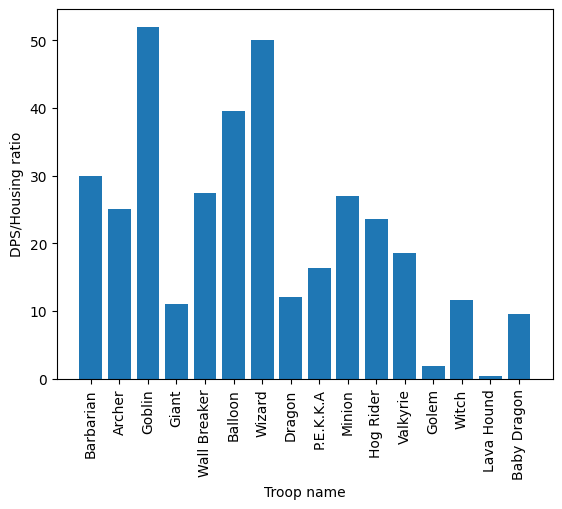

In [89]:
# Get dps/housing + speed/housing ratio for each troop at HDV 9:
names = df['name'].tolist()
for name in names:
    if name == 'Healer':
        del names[names.index(name)]

dps_ratio = []
speed_ratio = []

for row in df.iterrows():
    if row[1]['name'] == 'Healer':
        continue

    housing_space = row[1]['housingSpace']

    speed = row[1]['speed']

    level = row[1]['levels'][8]
    dps_list = row[1]['dps']
    dps = dps_list[level]

    ratio = dps/housing_space
    
    dps_ratio.append(ratio)

dps_ratio = dps_ratio[:-2] # Get rid Barbarian King and Archer Queen
names = names[:-2] # Get rid Barbarian King and Archer Queen

ratio_1 = pd.DataFrame({'name': names, 'dps_ratio': dps_ratio}) 
plt.bar(ratio_1['name'], ratio_1['dps_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Troop name')
plt.ylabel('DPS/Housing ratio')
plt.show()



    

   